<a href="https://colab.research.google.com/github/FaragoFa/Materia-de-aprendizaje/blob/master/Cafe_Especialidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Final - Cafe de Especialidad**

### **Alumno** : Facundo Faragó
### **mail** : facundofarago@gmail.com
### **Profesor** : Claudio Delrieux


# **Librerias Usadas**

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# **Objetivo**

El objetivo es predecir el pais de origen del cafe a partir de sus caracteristicas. Para esto, se utilizara el algoritmo "Random Forest", el cual es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia.

# **Dataset a utilizar - Coffee Quality database from CQI**

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv")

# **Procesamiento de los datos**

Filtro las caracteristicas que tienen datos innecesarios

In [26]:
df_filt = df[['Country.of.Origin',"Aroma","Flavor","Aftertaste", "Processing.Method",
              "Acidity","Body","Balance","Uniformity","Clean.Cup","Sweetness","Cupper.Points",
              "Total.Cup.Points","Moisture","Category.One.Defects","Quakers","Color","Category.Two.Defects",
              "altitude_mean_meters", "Variety"]]

Borro los datos con valores vacios

In [27]:
print ("Datos sin filtrar: ",df.shape)
df_filt = df_filt.dropna()
print ("Datos filtrados (Dataframe inicial): ",df_filt.shape)

Datos sin filtrar:  (1311, 44)
Datos filtrados (Dataframe inicial):  (904, 20)


Transformo las caracteristicas no numericas para poder trabajar con ellas:

In [28]:
labelEncoder = LabelEncoder()
df_filt["Variety"] = labelEncoder.fit_transform(df_filt["Variety"])
df_filt['Country.of.Origin'] = labelEncoder.fit_transform(df_filt['Country.of.Origin'])

df_filt["Color"] = labelEncoder.fit_transform(df_filt["Color"])  
df_filt["Processing.Method"] = labelEncoder.fit_transform(df_filt["Processing.Method"])   

Muestro el histograma de cada caracteristica

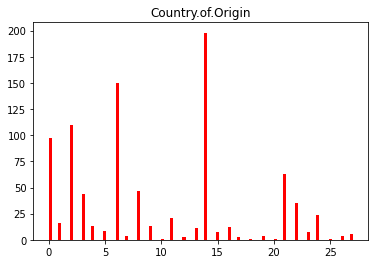

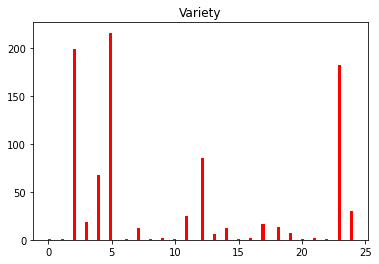

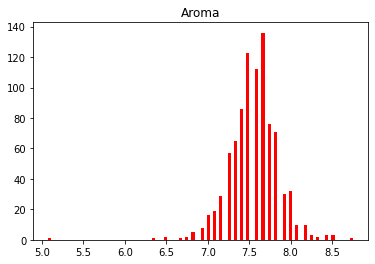

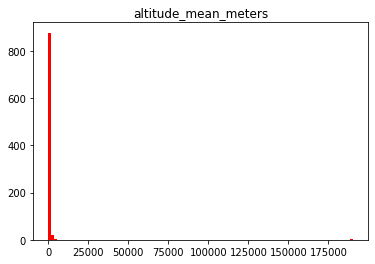

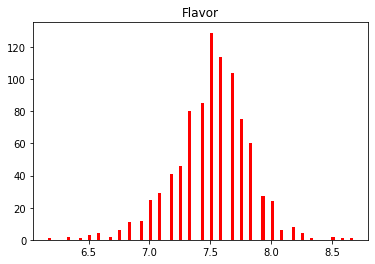

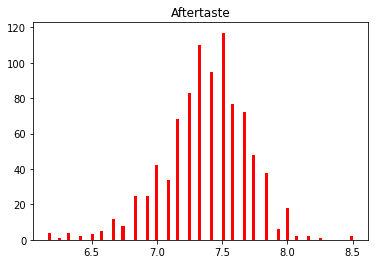

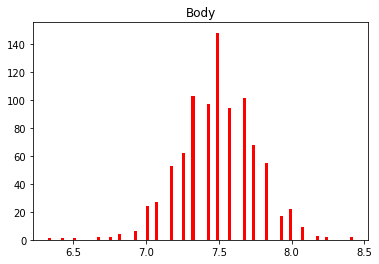

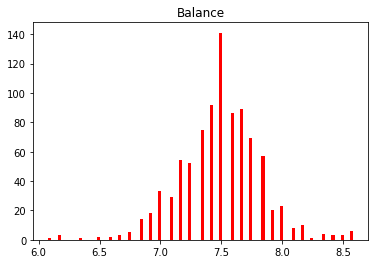

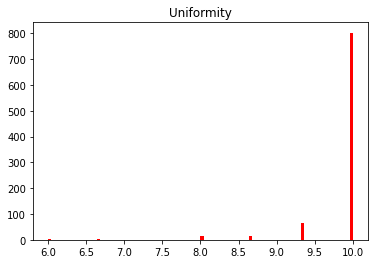

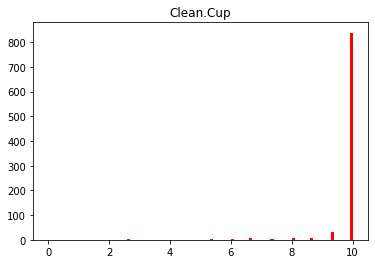

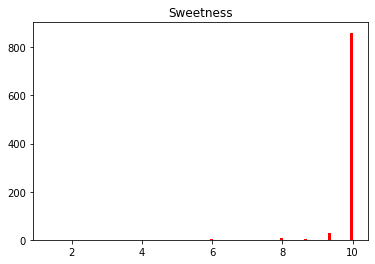

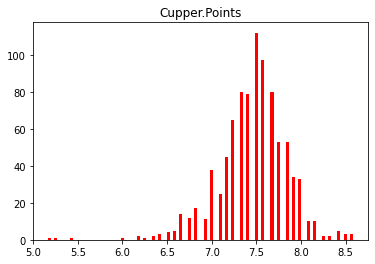

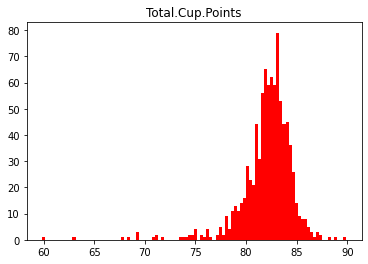

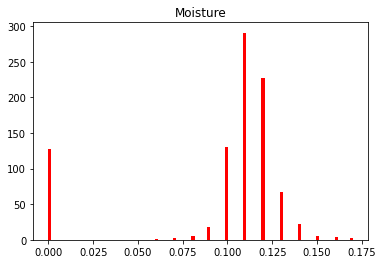

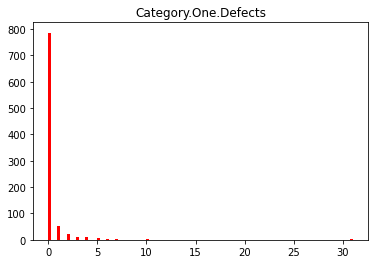

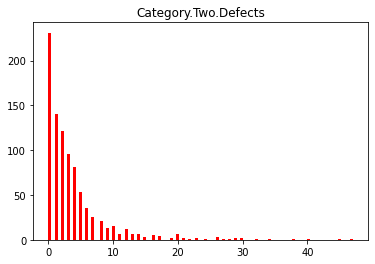

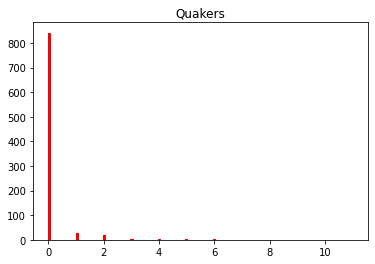

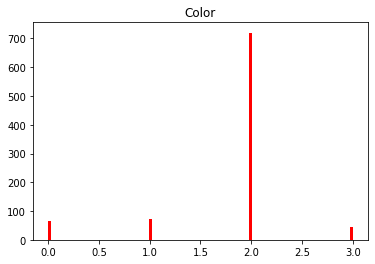

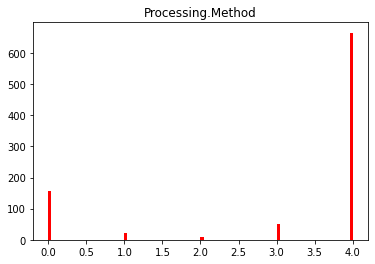

In [29]:
fig, axs = plt.subplots()
axs.set_title('Country.of.Origin')
axs.hist(df_filt['Country.of.Origin'], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Variety")
axs.hist(df_filt["Variety"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Aroma")
axs.hist(df_filt["Aroma"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("altitude_mean_meters")
axs.hist(df_filt["altitude_mean_meters"],bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Flavor")
axs.hist(df_filt["Flavor"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Aftertaste")
axs.hist(df_filt["Aftertaste"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Body")
axs.hist(df_filt["Body"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Balance")
axs.hist(df_filt["Balance"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Uniformity")
axs.hist(df_filt["Uniformity"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Clean.Cup")
axs.hist(df_filt["Clean.Cup"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Sweetness")
axs.hist(df_filt["Sweetness"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Cupper.Points")
axs.hist(df_filt["Cupper.Points"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Total.Cup.Points")
axs.hist(df_filt["Total.Cup.Points"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Moisture")
axs.hist(df_filt["Moisture"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Category.One.Defects")
axs.hist(df_filt["Category.One.Defects"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Category.Two.Defects")
axs.hist(df_filt["Category.Two.Defects"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Quakers")
axs.hist(df_filt["Quakers"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Color")
axs.hist(df_filt["Color"], bins=100, color='red')
plt.show() 

fig, axs = plt.subplots()
axs.set_title("Processing.Method")
axs.hist(df_filt["Processing.Method"], bins=100, color='red')
plt.show() 

Filtro las caracteristica muy concentradas

In [30]:
df_filt1 = df[['Country.of.Origin',"Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Cupper.Points",
               "Total.Cup.Points","Moisture","Category.Two.Defects", "Variety"]]

Nuevamente, borro los datos con valores vacios (porque si trabajo con la muestra anterior pierdo muchos datos)

In [31]:
df_filt1 = df_filt1.dropna()
print ("Datos filtrados (Dataframe final): ",df_filt1.shape)   
print()

Datos filtrados (Dataframe final):  (1110, 12)



Nuevamente, transformo las caracteristicas no numericas para poder trabajar con ellas (por lo mismo que en el punto anterior)

In [32]:
LabelEncoder()
df_filt1["Variety"] = labelEncoder.fit_transform(df_filt1["Variety"])
df_filt1['Country.of.Origin'] = labelEncoder.fit_transform(df_filt1['Country.of.Origin'])

Especifico caracteristicas a entrenar y target (Uso solo las caracteristicas no concentradas)

In [33]:
x = df_filt1[["Aroma","Flavor","Aftertaste","Acidity","Body","Balance",
             "Cupper.Points","Total.Cup.Points","Moisture","Category.Two.Defects", "Variety"]] #Caracteristicas
              
y = df_filt1['Country.of.Origin']  # Target

Escalo las muestras y los targets para ayudar en el entrenamiento

In [34]:
x = scale(x)   
y = scale(y) 

Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Creo y entreno el modelo

In [36]:
modelo = RandomForestRegressor()    # Cargar el tipo de modelo a usar
modelo.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados


RandomForestRegressor()

# **Resultados**

Obtengo el score de la red

In [41]:
score1 = modelo.score(xtest, ytest)    
print("Score:", score1)
print()


Score: 0.5487174219753201



Testeo

In [38]:
ypred = modelo.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

Obtengo el error comparando los targets originales del conjunto de datos de testeo y los targets predichos por el modelo entrenado

In [39]:
mse = mean_squared_error(ytest, ypred)  # Error medio cuadrático
print("MSE: ", mse)
print()

MSE:  0.47451123983994176



Muestro los resultados en un gráfico comparativo

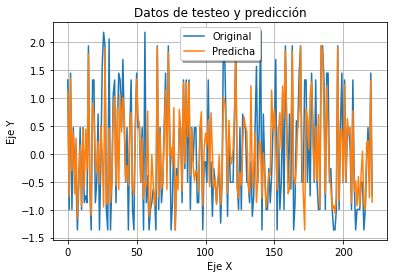

In [40]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Original")
plt.plot(x_ax, ypred, label="Predicha")
plt.title("Datos de testeo y predicción")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
